# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all tables of data
tables = pd.read_html(url)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Confirm DataFrame was created successfully
df=tables[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
# Change data types for data analysis
df2=df.astype({'terrestrial_date':'datetime64[ns]'})

In [9]:
# Confirm type changes were successful by examining data types again
df2.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
# 1. How many months are there on Mars?
months=df2['month'].unique()
months.sort()
for month in months:
    print(month, df2.loc[df2['month'] == month]['id'].count())

1 174
2 178
3 192
4 194
5 149
6 147
7 142
8 141
9 134
10 112
11 138
12 166


In [11]:
# 2. How many Martian days' worth of data are there?
df2['terrestrial_date'].count()

1867

In [12]:
# 3. What is the average low temperature by month?
average_low_temp=df2.groupby('month').mean()['min_temp']
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

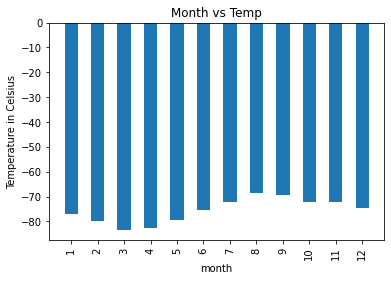

In [13]:
# Plot the average temperature by month
import numpy as np
labels=np.arange(12)+1

plt.bar(labels,average_low_temp,0.5)
plt.xlabel("month")
plt.xticks(labels, labels,rotation=90)
plt.ylabel("Temperature in Celsius")
plt.title("Month vs Temp")
plt.show()

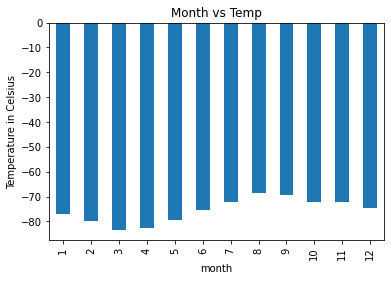

In [14]:
#alternative method to plot
average_low_temp.plot.bar()
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.title("Month vs Temp")
plt.show()

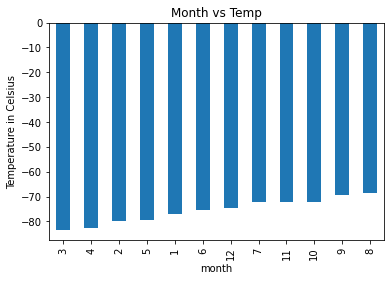

In [15]:
# Identify the coldest and hottest months in Curiosity's location
temp_sorted=average_low_temp.sort_values()
temp_sorted.plot.bar()
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.title("Month vs Temp")
plt.show()

Coldest month is March (3).
Hottest month is August (8).

In [16]:
# 4. Average pressure by Martian month
atm_pressure=df2.groupby('month').mean()['pressure']
atm_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

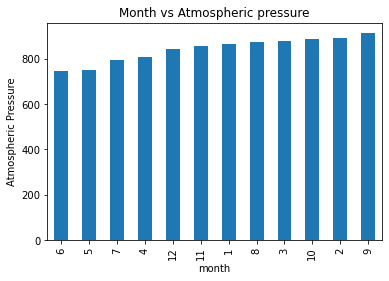

In [17]:
# Plot the average pressure by month
atm_pressure.sort_values().plot.bar()
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.title("Month vs Atmospheric pressure")
plt.show()

In [18]:
#find number of dates counting from the starting date of the dataframe
df2['date_count']=df2['terrestrial_date']-pd.to_datetime('2012-08-16')
df2.dtypes

id                            int64
terrestrial_date     datetime64[ns]
sol                           int64
ls                            int64
month                         int64
min_temp                    float64
pressure                    float64
date_count          timedelta64[ns]
dtype: object

In [19]:
#convert it to a timedelta with a day precision (to plot x axis later on)
df3=df2.astype({'date_count':'timedelta64[D]'})
df3

,id,terrestrial_date,sol,ls,month,min_temp,pressure,date_count
0,2,2012-08-16,10,155,6,-75.0,739.0,0.0
1,13,2012-08-17,11,156,6,-76.0,740.0,1.0
2,24,2012-08-18,12,156,6,-76.0,741.0,2.0
3,35,2012-08-19,13,157,6,-74.0,732.0,3.0
4,46,2012-08-20,14,157,6,-74.0,740.0,4.0
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2017.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2019.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2020.0


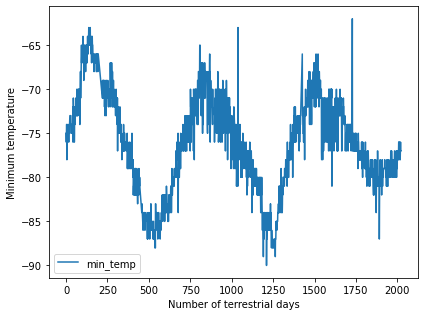

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df3.plot('date_count','min_temp',figsize=(6,4.5))
plt.xticks(np.arange(2021,step=250))
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df3.to_csv('mars_weather.csv')

In [22]:
browser.quit()